In [1]:
# implementation of linear regression 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
pd.__version__

'1.2.4'

In [11]:
plt.rcParams['figure.figsize'] = [20.0,10.0]

In [12]:
# reading the data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [13]:
# collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [14]:
# mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# using the formular to calculate b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i]-mean_x) * (Y[i]-mean_y)
    denom += (X[i]-mean_x) ** 2
    b1 = numer/denom
    b0 = mean_y - (b1*mean_x)
    
# print(coefficient and y intercept)
print(b1,b0)

0.26342933948939945 325.57342104944223


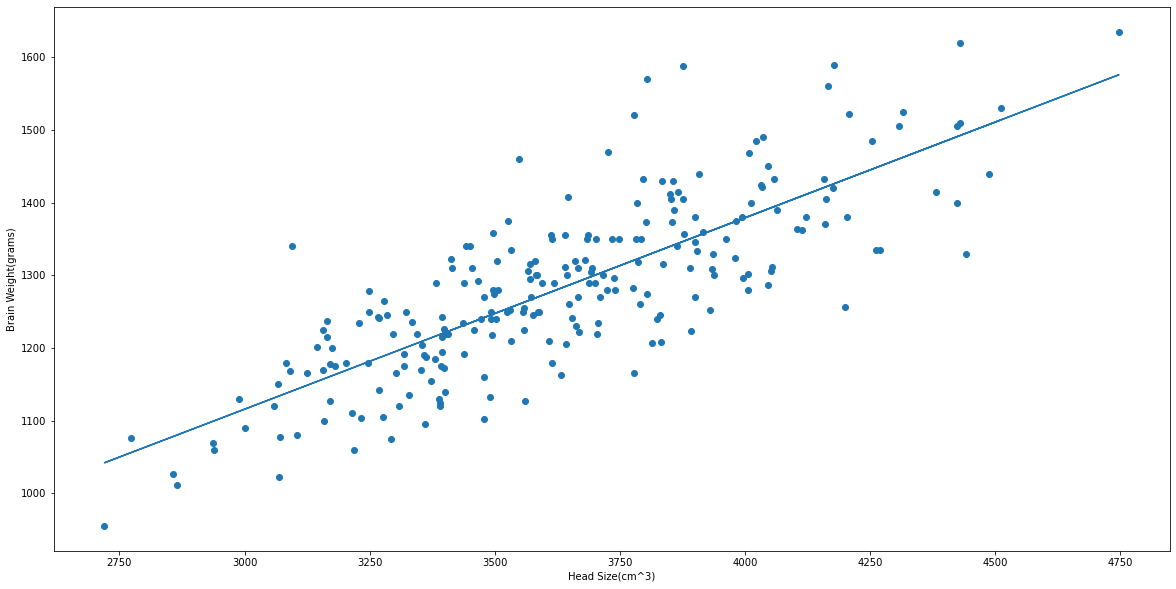

In [38]:
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.scatter(X,Y)
plt.plot(X,b1*X+b0)

In [15]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
    
r2 = 1-(ss_r/ss_t)
print(r2)
    

0.6393117199570003


In [49]:
#using scikit learn

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
#cannot use rank 1 matrix in scikit learn
X = X.reshape((m,1))
# creating the model
reg = LinearRegression()

In [54]:
#fitting the training data
reg = reg.fit(X,Y)

In [55]:
Y_pred = reg.predict(X)

In [58]:
Y_pred

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

In [59]:
# calculating the R2 score

In [60]:
r2_score = reg.score(X,Y)

In [61]:
print(r2_score)

0.639311719957


logistic regression projects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# collecting and opening data
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
print('# of passengers in original data:'+str(len(titanic_data)))

# of passengers in original data:891


In [20]:
titanic_data.size

10692

In [21]:
titanic_data.shape

(891, 12)

# analysis of data


<AxesSubplot:xlabel='Survived', ylabel='count'>

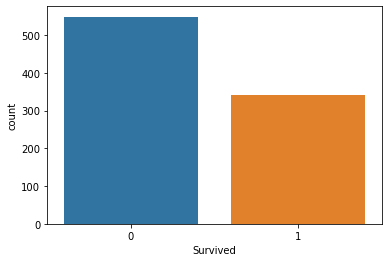

In [22]:
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

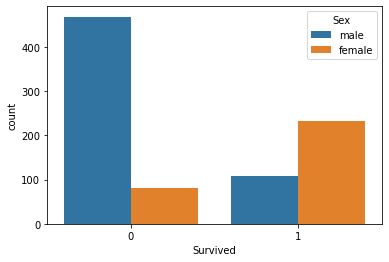

In [23]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

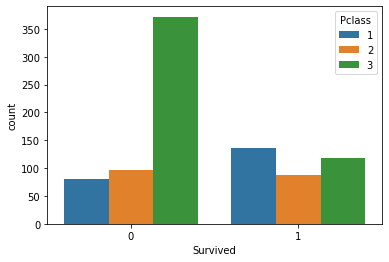

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

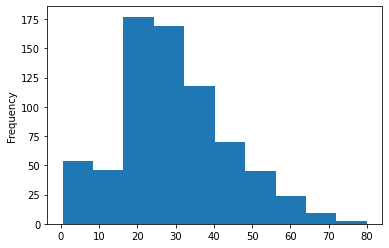

In [25]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

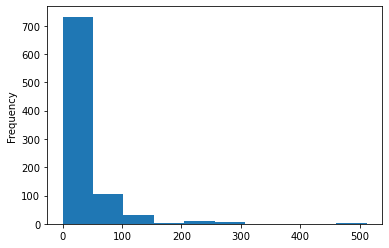

In [26]:
titanic_data['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

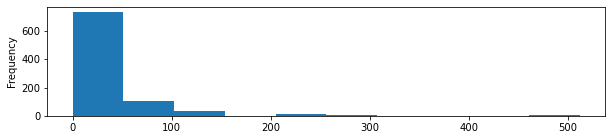

In [27]:
titanic_data['Fare'].plot.hist(figsize=(10,2))

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

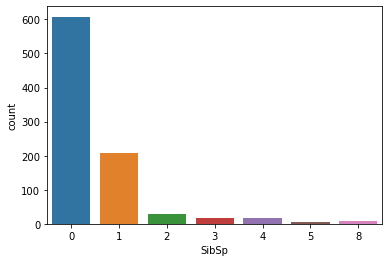

In [31]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

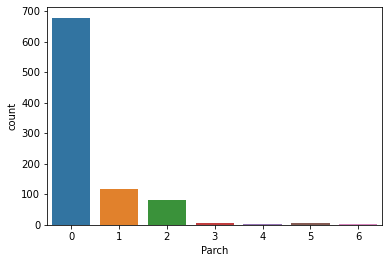

In [32]:
sns.countplot(x='Parch',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

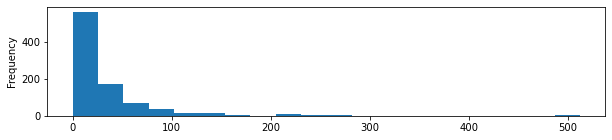

In [33]:
titanic_data['Fare'].plot.hist(figsize=(10,2),bins=20)

data wrangling

In [34]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

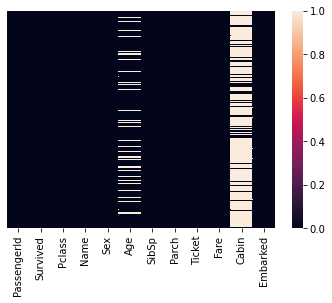

In [36]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

<AxesSubplot:>

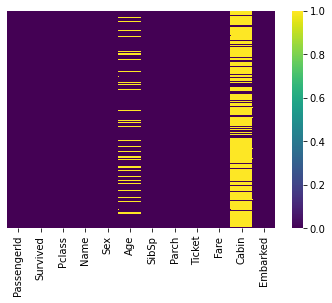

In [37]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

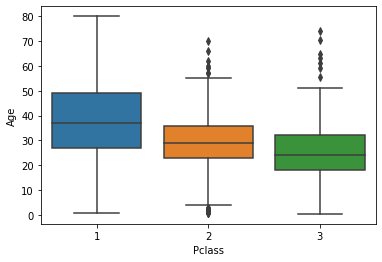

In [38]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [39]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[2]
    if(pd.isnull(Age)):
        if(Pclass==2):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

#method of imputation


In [62]:
#titanic_data['Age'] = titanic_data[['Age','Pclass'].apply(impute_age,axis=1)]

In [39]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [41]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
titanic_data.dropna(inplace=True)

In [43]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

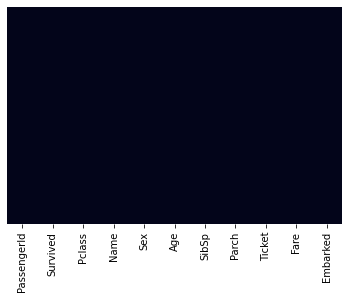

In [44]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [45]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
# converting the string values

In [48]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [49]:
 pd.get_dummies(titanic_data['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [50]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [51]:
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [53]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
Pcl = pd.get_dummies(data=titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [55]:
#concatenante the new column

In [56]:
titanic_data = pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [57]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [58]:
titanic_data.drop(['Sex','Embarked','PassengerId'],axis=1,inplace=True)

In [59]:
titanic_data.drop(['Name'],axis=1,inplace=True)

In [60]:
titanic_data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,373450,8.0500,1,0,1,0,1
6,0,1,54.0,0,0,17463,51.8625,1,0,1,0,0
7,0,3,2.0,3,1,349909,21.0750,1,0,1,0,1
8,1,3,27.0,0,2,347742,11.1333,0,0,1,0,1
9,1,2,14.0,1,0,237736,30.0708,0,0,0,1,0
10,1,3,4.0,1,1,PP 9549,16.7000,0,0,1,0,1


In [61]:
titanic_data.drop(['Ticket'],axis=1,inplace=True)

In [62]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [63]:
titanic_data.drop(['Pclass'],axis=1,inplace=True)

In [64]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [65]:
# train & test Data

In [66]:
# train data
x = titanic_data.drop(['Survived'],axis=1)
y=titanic_data['Survived']

In [67]:
x

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [1]:
conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Engr



In [7]:
import pandas as pd

In [10]:
pd.__version__



'1.2.4'

In [1]:
import numpy as np

In [2]:
np.__version__

'1.20.1'

In [4]:
import scipy as scipy

In [5]:
scipy.__version__

'1.6.2'

In [7]:
import sklearn

In [8]:
sklearn.__version__

'0.24.1'

In [69]:
# train dataset


In [70]:
x

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


In [71]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [73]:
# import sklearn libraries
import sklearn

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression()

In [85]:
logmodel.fit(x_train,y_train)

C:\Users\Engr. Tom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
predictions = logmodel.predict(x_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test,predictions)

0.7710280373831776

In [99]:
accuracy_score(y_test,predictions) * 100

77.10280373831776

second project for logistic regression

SUV PREDICTIONS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn 

In [41]:
#load the dataset
dataset = pd.read_csv('suv_data.csv')

In [42]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [46]:
# selecting x and y
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [47]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [50]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [22]:
# we need to scale the data
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
classifier = LogisticRegression(random_state=0)

In [35]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [37]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)*100

32.0

CART aalgorithm using python

In [51]:
# sample dataset
# format: each row is an example
# the last column is the label
# the first two columns are features
# if you want you can add more features & examples
# interesting note: 2nd and 5th examples have the same features,but different labels

In [53]:
training_data = [
    ['Green',3,'Mango'],
    ['Yellow',3,'Mango'],
    ['Red',1,'Grape'],
    ['Red',1,'Grape'],
    ['Yellow',3,'Lemon']
] 

# column labels.
# these are used only to print the tree.
header = ['color','diameter','label']

In [54]:
def unique_vals(rows,col):
    """find the unique values for a column in a dataset"""
    return set([row[col]for row in rows])

######
#Demo:
#unique_vals(training_data, 0)
#unique_vals(training_data, 1)

In [1]:
def class_counts(row):
    """Counts the number of each type of example in a dataset"""
    counts = {} # a dictionary of label- count.
    for row in rows:
        # in our dataset format, the lable is alway the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

######
#Demo:
# class_counts(training_data)
#####

def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

####
# Demo:
#is_numeric(7)
#########
class Question:
    """A Question is used to partition a dataset.
    
    This class just records a 'colum number'(e.g.,0 for color) and a
    'column value'(e.g.,Green).The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demon below.
    """
    
    def __init__(self,column,value):
        self.column = column
        self.value = value
        
        
    def match(self,example):
        #compare the feature value in an example to the
        #feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
    
    def __repr__(self):
        # This is a just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition ='>='
        return 'Is %s %s %s?' %(
            header[self.column], condition, str(self.value))
    
    
######
def partition(rows,question):
    """Partitions a dataset.
    
    for each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows,false_rows = [],[]
    for i in rows:
        if question.maatch(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

########
# Demo:
# let's partition the training data based on whether rows are Red.
# true_rows,false_rows = partition(training_data,Question(0,'Red'))
# This will contain all the 'Red' rows
# This will contain everything else.
#false_rows

#######

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    
    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://wikipedia.org/wiki/Decision_tree_Learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for 1b1 in counts:
        prob_of_1b1 = counts[1b1] / float(len(rows))
        impurity -= prob_of_1b1**2
    return impurity

#########
# Demo:
# Let look at some example to understand how Gini Impurity works. 
#

def info_gain(left,right,current_uncertainty):
    """ Information Gain.
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """ 
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1-p) * gini(right)

#######
# Demo:
# cal. the uncertainy of our training data
# current_uncertainty = gini(training_data)
# How much information do we gain by partition on 'Green'
# true_rows,false_rows = partition(training_data,Question(0, 'Green'))
# info_gain(true_rows, false_rows,current_uncertainty)

# what about if we partioned on 'Red' instead?
# true_rows,false_rows = partition(training_data, Question(0,'Green'))
# info_gain(true_rows,false_rows, current_uncertainty)

# what about if we partioned on 'Red' instead?
# true_rows, false_rows = partition(training_data, Question(0,'Red'))
# info_gain(true_rows, false_rows, current_uncertainty)

def find_best_split(rows):
    """find the best question to ask by iterating over every feature/value and calculating the information gain"""
    best_gain = 0 # keep track of the best information  gain
    best_question = None # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) -1 # number of columns
    
    for val in values: # for each value
        
        question = Question(col,val)
        
        # try splitting the dataset
        true_rows, false_rows = partition(rows,question)
        
        # Skip this split if it doesn't divide the 
        # dataset
        if len(true_rows) == 0 or len(false) == 0:
            continue
            
        # cal. the information gain from this split
        gain = info_gain(true_rows, false_rows, current_uncertainty)
        
        # you actually can use '>' instead of '>' here
        # but i wanted the tree to look a certain way for our
        # toy dataset.
        if gain >= best_gain:
            best_gain, best_question = gain, question
            
    return best_gain, best_question


########
# Demo:
# find the best question to ask first for our toy dataset.
# best_gain, best_question = find_best_split(training_data)
# FYI: is color == Red is just as good. See the note in the code above
#  where I is used '>='.
#########

class leaf:
    """ A leaf node classifies data
    
    This holds a dictionary of class(e.g.,"Mango")-> number of times
    it appears in the rows from the training data that reach this leaf.
    """
    
    def __init__(self,rows):
        self.predictions = class_counts(rows)
        
class Decision_Node:
    """ A Decision Node asks a question.
    This holds a reference to the question, and to the two child nodes.
    """
    
    def __init__(self,
                question,
                true_branch,
                false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        
def build_tree(rows):
    """Builds the tree.
    Rules of recursion: 1) Believe that it works. 2) start checking
    for the base case(no further information gain). 3) prepare for"""

def build_tree(rows):
    """Builds the tree."""
    
    # try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)
    
    # Base case: no further info gain
    # since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return leaf(rows)
    
    # if we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)
    
    # Recursively build the true branch.
    true_branch = build_tree(true_rows)
    
    # Recursively build the false branch.
    false_branch = build_tree(false_rows)
    
    # Return a question node
    # this record the best feature / value to ask at this point,
    # as well as the branches to follow
    # depending on the answer,
    return Decision_Node(question, true_branch, false_branch)

def print_tree(node, spacing=""):
    
    # Base case: we've reached a leaf
    if isinstance(node, leaf):
        print(spacing + 'Predict',node.predictions)
        return
    
    # print the question at this node
    print(spacing + str(node.question))
    
    # call this function recursively on the true branch
    print(spacing + "--> True")
    print_tree(node.true_branch, spacing + " ")
    
    # call this function recursively on the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + " ")
    
def classify(row,node):
    
    # Base case: we've reached a leaf
    if isinstance(node, leaf):
        return node.predictions
    
    # Decide whether to follow the true-branch or the false-branch.
    # compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        else:
            return classify(row, node.false_branch)
        

########
# Demo:
# printing that a bit nicer
# print_leaf(classify(training_data[0], my_tree))
########

########
def print_leaf(counts):
    """print the predictions at a leaf."""
    total = sum(counts.value()) * 1.0
    probs = {}
    for 1b1 in counts.keys():
        probs[1b1] = str(int(counts[1b1] / total * 100)) + "%"
        return probs
    
    
##########
# Demo:
# Printing that a bit nicer
# print_leaf(classify(training_data[0], my_tree))
#########

########
# Demo:
# On the second example, the confidence is lower
# print_leaf(classify(training_data[1],my_tree))
###########

if __name__ == '__main__':
    
    my_tree = build(training_data)
    
    print_tree(my_tree)
    
    # Evaluate
    testing_data = [
        
    ['Green',3,'Mango'],
    ['Yellow',4,'Mango'],
    ['Red',2,'Grape'],
    ['Red',1,'Grape'],
    ['Yellow',3,'Lemon']
    ]
    
    for row in testing_data:
        print('Actual: %s, Predicted: %s' % 
             row[-1], print_leaf(classify(row, my_tree))))
        
        
# Next steps
#- add support for missing(or unseen) attributes
# prune the tree to prevent overfitting
# add support for regression
    


SyntaxError: invalid syntax (<ipython-input-1-373394bbb21a>, line 92)

Decision Tree

KNN .....k nearest neighbor algorithm

In [4]:
import csv
with open(r'iris.csv') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

sepal_length, sepal_width, petal_length, petal_width, species
5.1, 3.5, 1.4, 0.2, setosa
4.9, 3.0, 1.4, 0.2, setosa
4.7, 3.2, 1.3, 0.2, setosa
4.6, 3.1, 1.5, 0.2, setosa
5.0, 3.6, 1.4, 0.2, setosa
5.4, 3.9, 1.7, 0.4, setosa
4.6, 3.4, 1.4, 0.3, setosa
5.0, 3.4, 1.5, 0.2, setosa
4.4, 2.9, 1.4, 0.2, setosa
4.9, 3.1, 1.5, 0.1, setosa
5.4, 3.7, 1.5, 0.2, setosa
4.8, 3.4, 1.6, 0.2, setosa
4.8, 3.0, 1.4, 0.1, setosa
4.3, 3.0, 1.1, 0.1, setosa
5.8, 4.0, 1.2, 0.2, setosa
5.7, 4.4, 1.5, 0.4, setosa
5.4, 3.9, 1.3, 0.4, setosa
5.1, 3.5, 1.4, 0.3, setosa
5.7, 3.8, 1.7, 0.3, setosa
5.1, 3.8, 1.5, 0.3, setosa
5.4, 3.4, 1.7, 0.2, setosa
5.1, 3.7, 1.5, 0.4, setosa
4.6, 3.6, 1.0, 0.2, setosa
5.1, 3.3, 1.7, 0.5, setosa
4.8, 3.4, 1.9, 0.2, setosa
5.0, 3.0, 1.6, 0.2, setosa
5.0, 3.4, 1.6, 0.4, setosa
5.2, 3.5, 1.5, 0.2, setosa
5.2, 3.4, 1.4, 0.2, setosa
4.7, 3.2, 1.6, 0.2, setosa
4.8, 3.1, 1.6, 0.2, setosa
5.4, 3.4, 1.5, 0.4, setosa
5.2, 4.1, 1.5, 0.1, setosa
5.5, 4.2, 1.4, 0.2, setosa
4.9, 3.1, 1.5, 0.2, 

In [2]:
import csv
import random
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [24]:
trainingSet=[]
testSet=[]
loadDataset(r'iris.csv.',0.66, trainingSet, testSet)
print('train: ' + (len(trainingSet)))
print('Test: '+(len(testSet)))

ValueError: could not convert string to float: 'sepal_length'

In [6]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [7]:
data1 = [2,2,2,'a']
data2 = [4,4,4,'b']
distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))



Distance: 3.4641016151377544


In [10]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [11]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [20]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [21]:
neighbors = [[1,1,1,'a'],[2,2,2,'a'],[3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


In [22]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [23]:
testSet = [[1,1,1,'a'],[2,2,2,'a'],[3,3,3,'b']]
predictions = ['a','a','a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [26]:
def main():
    # prepare data
    trainingSet=[]
    testSet = []
    split = 0.67
    loadDataset('iris.csv',split, trainingSet, testSet)
    print('Train set:' + repr(len(trainingSet)))
    print('Test set:' + repr(len(testSet)))
    
    # generative predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    
main()

ValueError: could not convert string to float: 'sepal_length'

NAIVE BAYES ALgorithm

In [1]:
import csv
import math
import random

In [19]:
def loadCsv(filename):
    lines = cvs.reader(open(r'diabetes.csv'))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [20]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [21]:
def separatedByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [22]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [23]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [24]:
def summarize(dataset):
    summaries = [(mean(attribute),stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [25]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [11]:
def calculateprobability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev)) * exponent

In [26]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummeries[i]
            x = inputVector[i]
            probabilities[classvalue] *= calculateprobability(x, mean, stdev)
        return probabilities

In [27]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLable is None or probability > bestprob:
            bestprob = probability
            bestLable = classValue
        return bestLabel

In [28]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [29]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(test)):
        if testset[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [33]:
def main():
    filename = 'diabetes'
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('split {} rows into train = {} and test = {} rows'.format(len(dataset),len(trainingSet),len(testSet)))
    #prepare model
    summaries = summarizeByclass(trainingSet)
    #test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: (0)%'.format(accuracy))
    
main()

NameError: name 'cvs' is not defined

using scikit learning nave bayes

In [34]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [36]:
dataset = datasets.load_iris()

In [37]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

GaussianNB()

In [38]:
print(model)

GaussianNB()


In [40]:
expected = dataset.target
predicted = model.predict(dataset.data)

In [41]:
print(metrics.classification_report(expected,predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [44]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


K MEAN Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('movies_metadata.csv')

C:\Users\Engr. Tom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # for plot styling
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
# importing the dataset
data = pd.read_csv('movies_metadata.csv')
print(data.shape)



(45466, 24)


C:\Users\Engr. Tom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
print(data.head)

<bound method NDFrame.head of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                             

In [12]:
data.isnull()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
45462,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
45463,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45464,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [14]:
data.dropna(axis=0,inplace=True)

In [15]:
data.shape

(693, 24)

In [16]:
data.describe()

,revenue,runtime,vote_average,vote_count
count,6.930000e+02,693.000000,693.000000,693.000000
mean,2.348037e+08,107.363636,6.270996,1691.366522
std,3.299089e+08,27.243771,1.012328,2215.285619
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,91.000000,5.800000,121.000000
50%,8.332000e+07,103.000000,6.300000,688.000000
75%,3.613666e+08,121.000000,7.000000,2491.000000
max,2.787965e+09,476.000000,8.500000,12269.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 9 to 45029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  693 non-null    object 
 1   belongs_to_collection  693 non-null    object 
 2   budget                 693 non-null    object 
 3   genres                 693 non-null    object 
 4   homepage               693 non-null    object 
 5   id                     693 non-null    object 
 6   imdb_id                693 non-null    object 
 7   original_language      693 non-null    object 
 8   original_title         693 non-null    object 
 9   overview               693 non-null    object 
 10  popularity             693 non-null    object 
 11  poster_path            693 non-null    object 
 12  production_companies   693 non-null    object 
 13  production_countries   693 non-null    object 
 14  release_date           693 non-null    object 
 15  reve

In [19]:
data['budget']

9         58000000
68         3500000
69        19000000
153        2000000
178       15000000
           ...    
44274    152000000
44674            0
44821     16000000
44842    260000000
45029            0
Name: budget, Length: 693, dtype: object

In [20]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [21]:
data.size

16632

In [22]:
data.shape

(693, 24)

In [25]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() # for plot styling
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
# importing the dataset
data = pd.read_csv('movie_metadata.csv')
print(data.shape)
print(data.head)



(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David M

In [26]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [27]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [29]:
newdata = data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [30]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [32]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [40]:
data.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [45]:
np.where(pd.isnull(data))

(array([   4,    4,    4, ..., 5040, 5041, 5041], dtype=int64),
 array([ 0,  2,  3, ..., 26, 16, 22], dtype=int64))

In [43]:
pd.isnull(data)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [35]:
# using the KMeans from sklearn
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans()

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
newdata = imputer.fit_transform(data)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Color'

In [50]:
#data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [47]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [48]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [49]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [53]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [55]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [56]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [57]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
newdata = imputer.fit_transform(newdata)

In [62]:
newdata

array([[   0.,  855.],
       [ 563., 1000.],
       [   0.,  161.],
       ...,
       [   0.,    0.],
       [   0.,  489.],
       [  16.,   16.]])

In [63]:
# using the kmeans from sklearn
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters=5)

In [68]:
kmeans = KMeans()

In [69]:
kmeans.fit(newdata)

KMeans()

In [70]:
kmeans.cluster_centers_

array([[12441.17647059,   604.34313725],
       [  162.40890915,   395.90537289],
       [  229.15714286, 10771.42857143],
       [17545.45454545, 14545.45454545],
       [  428.03921569,  3980.39215686],
       [21266.66666667,   831.66666667],
       [   75.11111111, 17777.77777778],
       [16490.56603774,   532.86792453]])

In [71]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 1 1 1]
5043


In [72]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 102, 1: 4732, 2: 70, 3: 11, 4: 51, 5: 15, 6: 9, 7: 53}


In [81]:
# plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.Implot('director_facebook_likes','actor_3_facebook_likes',data=newdata, hue='cluster',
        palette='coolwarm',size=5,aspect=1,fit_reg=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

reinforcement learning

In [21]:
import numpy as np

In [22]:
# R matrix
R = np.matrix([[-1,-1,-1,-1,0,-1],
              [-1,-1,-1,0,-1,100],
              [-1,-1,-1,0,-1,-1],
              [-1,0,0,-1,0,-1],
              [-1,0,0,-1,-1,100],
              [-1,0,-1,-1,0,100]])

In [23]:
#Q matix
Q = np.matrix(np.zeros([6,6]))

In [24]:
# Gamma(learning parameter)
gamma = 0.8

In [25]:
# Initial sate.(Usually to be chosen at random)
initial_state = 1

In [26]:
# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
     

In [27]:
# Get available actions in the current state
available_act = available_actions(initial_state)

In [28]:
# This function chooses at random which action to be performed within the range
# of all the available actions.

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [31]:
# Sample next action to be performed
action = sample_next_action(available_act)

In [32]:
# This function updates the Q matrix according to the path selected and the 
# learning algorithm

def update(current_state,action,gamma):
    max_index = np.where(Q[action] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        
        max_index = int(max_index)
        max_value = Q[action, max_index]
        
        # Q Learning formula
        Q[current_state, action] = R[current_state, action] + gamma * max_value

In [33]:
# Update Q matrix
update(initial_state, action, gamma)

In [34]:
# Training

In [35]:
# train over 10,000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, gamma)

In [36]:
# Normalize the "trained" Q matrix
print('Trained Q matrix:')
print(Q / np.max(Q) * 100)

Trained Q matrix:
[[nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


<ipython-input-36-18e5958b7984>:3: RuntimeWarning: invalid value encountered in true_divide
  print(Q / np.max(Q) * 100)


In [37]:
# Testing 
# Goal state = 5
# Best sequence path starting from 2 -> 2, 3,1,5

In [41]:
current_state = 1
steps = [current_state]
while current_state != 5:
    next_step_index = np.where(Q[current_state] == np.max(Q[current_state]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(next_step_index)
        
    else:
        next_step_index = int(next_step_index)
        
    steps.append(next_step_index)
    current_state = next_step_index

# print selected sequence of steps
print('Selected path:')
print(steps)
    
        

TypeError: only size-1 arrays can be converted to Python scalars

REINFORCEMENT LEARNING PART2

In [1]:
# Only numpy
import numpy as np

In [2]:
#Initialize parameters
gamma = 0.75 # Discount factor
alpha = 0.9 # Learning rate

In [3]:
# Define the states
location_to_states = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

In [4]:
# Define the actions
actions = [0,1,2,3,4,5,6,7,8]

In [6]:
# Define the rewards
rewards = np.array([[0,1,0,0,0,0,0,0,0],
                    [1,0,1,0,0,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0],
                    [0,0,0,0,0,0,1,0,0],
                    [0,1,0,0,0,0,0,1,0],
                    [0,0,1,0,0,0,0,0,0],
                    [0,0,0,1,0,0,0,1,0],
                    [0,0,0,0,1,0,1,0,1],
                    [0,0,0,0,0,0,0,1,0]])

In [8]:
# maps indices to locations
state_to_location = dict((state,location) for location,state in location_to_state.items())

NameError: name 'location_to_state' is not defined

In [9]:
def get_optimal_route(start_location, end_location):
    # copy the rewards matrix to new matrix
    rewards_new = np.copy(rewards)
    # Get the ending state corresponding to the ending location as given
    ending_state = location_to_state[end_location]
    # with the above information automatically set the priority of the given ending state to the highest one
    rewards_new[ending_state,ending_state] = 999
    
    #-------------Q learning algorithm-------------
    
    # Initializing Q-values
    Q = np.array(np.zeros([9,9]))
    
    # Q-learning process
    for i in range(1000):
        # pick up a state randomly
        current_state = np.random.randint(0,9) # python excludes the upper bound
        # for traversing through the neighbor locations in the maze
        playable_actions = []
        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(9):
            if rewards_new[current_state,j] > 0:
                playable_actions.append(j)
        # pick an action randomly from the list of playable actions leading us to the next state
        next_state = np.random.choice(playable_actions)
        # compute the temporal difference
        # the action here exactly refers to going to the next state
        TD = rewards_new[current_state,nest_state] + gamma * Q[next_state,np.argmax(Q[next_state])] -Q[current_state,next_state]
        # Update the Q-Value using the Bellman equation
        Q[current_state,next_state] += alpha * TD
        
    # Initialize the optimal route with the starting location
    route = [start_location]
    # we do not know the next location yet, so initialize with the value of starting location
    next_location = start_location
    
    # We dont know the exact number of iteration needed to reach to the final location hence whike loop will be 
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        # next the highest Q-value partaining to starting state
        next_state = np.argmax(Q[starting_state,])
        # We got the index of the next state. But we need the corresponding letter
        next_location = state_to_location[next_state]
        route.append(next_location)
        route.append(next_location)
        # update the starting location for the next iteration
        start_location = next_location
        
    return route
        

In [10]:
print(get_optimal_route('L1','L9'))

NameError: name 'location_to_state' is not defined

DEEP LEARNING USING TENSORFLOW

In [1]:
conda install jupyter


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Engr



In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

ModuleNotFoundError: No module named 'tensor'